# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import cv2
import pandas as pd
import tensorflow as tf
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join('C:\\Users\matth\CarND-Traffic-Sign-Classifier-Project','train.p')
validation_file=os.path.join('C:\\Users\matth\CarND-Traffic-Sign-Classifier-Project','valid.p')
testing_file =  os.path.join('C:\\Users\matth\CarND-Traffic-Sign-Classifier-Project','test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train[:])

# TODO: Number of testing examples.
n_test = len(X_test[:])
n_valid= len(X_valid[:])
# TODO: What's the shape of an traffic sign image?
image_shape = [len(X_train[0,:]),len(X_train[0,:])]
features_shape=X_test.shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(pd.read_excel("C://Users/matth/CarND-Traffic-Sign-Classifier-Project/signnames.xlsx",skiprows=0))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of valid examples =",n_valid)
print("Image data shape =", image_shape)
print("Features shape=",features_shape)
print("Number of classes =", n_classes)
print("Number of y_train classes=",max(y_train)+1)

Number of training examples = 34799
Number of testing examples = 12630
Number of valid examples = 4410
Image data shape = [32, 32]
Features shape= (12630, 32, 32, 3)
Number of classes = 43
Number of y_train classes= 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

17


NameError: name 'sign_Name' is not defined

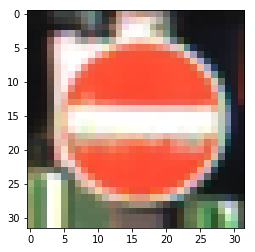

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")
print(y_train[index])
recognition=sign_Name[y_train[index]]
print(recognition)
print(index)

## Histogram visualization

In [ ]:
### Reshape 

plt.figure()
plt.hist(y_train,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")


plt.hist(y_test,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")


plt.hist(y_valid,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Data preprocessing,visualization and resizing

In [40]:
### preprocess data and reshape tensor

index = random.randint(0, len(X_train))
k=[]
for i in range(0, n_train):
    image_train = X_train[i]
    image_train = cv2.cvtColor(image_train, cv2.COLOR_RGB2GRAY)
    norm = image_train.shape
    norm = cv2.normalize(image_train,  norm, 0, 255, cv2.NORM_MINMAX)
    k.append(norm)

l=[]
for i in range(0,n_valid):
    image_valid = X_valid[i]
    image_valid = cv2.cvtColor(image_valid, cv2.COLOR_RGB2GRAY)
    norm = image_valid.shape
    norm = cv2.normalize(image_valid,  norm, 0, 255, cv2.NORM_MINMAX)
    l.append(norm)
    
m=[]
for i in range(0,n_test):
    image_test = X_test[i]
    image_test = cv2.cvtColor(image_test, cv2.COLOR_RGB2GRAY)
    norm = image_test.shape
    norm = cv2.normalize(image_test,  norm, 0, 255, cv2.NORM_MINMAX)
    m.append(norm)
    
X_train = np.reshape(k, (-1, 32, 32, 1))
X_valid = np.reshape(l, (-1, 32, 32, 1))
X_test  = np.reshape(m, (-1, 32, 32, 1))
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### 1.) All Datasets have been converted from RGB to Grayscale. The advantage of this technique is to reduce the amount of information to feed the NN with. Also by reducing the channelsize from 3 to 1 the NN just has to focus on the brightness, not on color. So it's easier to classify images which results in a higher training, validation and test accuracy.
### 2.) All Grayscale Images are going to be normalized . The NN is working better with small numbers than big ones. Normalizing means we scale the brightnessrange from 0 till 255 to 0 till 1.

### Afterwards all images will be fed again to a tensor by using the command "np.reshape(list(-1,32,32,1)).



In [4]:
### Set Epochs and Batchsize
###
EPOCHS = 10
BATCH_SIZE = 32

### Model Architecture

In [5]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    Fw=tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma))
    Fb=tf.Variable(tf.zeros(6))
    strides=[1,1,1,1]
    
    
    conv1=tf.nn.conv2d(x,Fw,strides,padding='VALID')+Fb
    # TODO: Activation.
    conv1=tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1=tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    Fw=tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    Fb=tf.Variable(tf.zeros(16))
    strides=[1,1,1,1]
    
    
    conv2=tf.nn.conv2d(conv1,Fw,strides,padding='VALID')+Fb
    
    # TODO: Activation.
    conv2=tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0=flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1w=tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    fcb1=tf.Variable(tf.zeros(120))
    
    fc1=tf.matmul(fc0,fc1w)+fcb1
    # TODO: Activation.
    fc1=tf.nn.relu(fc1)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2w=tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fcb2=tf.Variable(tf.zeros(84))
    
    fc2=tf.matmul(fc1,fc2w)+fcb2
    
    # TODO: Activation.
    fc2=tf.nn.relu(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fcw3=tf.Variable(tf.truncated_normal(shape=(84,n_classes),mean=mu,stddev=sigma))
    fcb3=tf.Variable(tf.zeros(n_classes))
    
    logits=tf.matmul(fc2,fcw3)+fcb3
    return logits
### Feel free to use as many code cells as needed.

### I have implented the LeNet 5. It was used succesfully for the Mnist Dataset, so I gave it a try for the Traffic Sign Classification. The LeNet 5 consist of 5-Layer, whereby the input Image size is 32x32x1 (grayscale). 

### Layer 1-> Input(32x32x1), Output(28,28,6)
### Pooling -> Input(28,28,6), Output(14,14,6)
### Layer 2-> Input(14,14,6), Output(10,10,16)
### Pooling -> Input(10,10,16), Ouput(5,5,16)
### Flatten -> Input(5,5,16) -> Output 400
### Layer 3 -> Input (400) , Output(120)
### Layer 4 fully connected: Input(120), Output(84)
### Layer 5 fully connected: Input(84), Output(43)

### Bias has not been applied. It's been set to zero in this case!

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

## Training Pipeline

In [6]:
### Train your model here.
### Features and Labels

x = tf.placeholder(tf.float32, (None, 32, 32, 1)) ### Channel-Output changed from 1 to 3
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train LeNet
### low learning rate results in higher accuracy / better training results
rate = 0.0005

logits = LeNet(x)
labels=tf.argmax(logits, 1)
softmax=tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



## The Hyperparameters have been set to:
### Epoch = 10 has not been increased. After 10 epochs the accuracy hasn't changed at all. It was almost constant after Epoch =10!

### Batchsize =32. For several training approaches a Batchsize of 32 has been the best in this case.

### learningrate= 0.0005. I decreased the learningrate to 0.0005 in order to create a better learning process. By this learningrate I got the best results.

### mu = 0
### stddev= 0.05. By lowering the standarddeviation to 0.05 I reached an Optimum. 

### Optimizer = AdamOptimizer -> Automation of learning rate decay and Momentum




## Evaluation

In [7]:
### Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Training and Evaluation

In [10]:
### Calculate and report the accuracy on the training and validation set.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.870

EPOCH 2 ...
Validation Accuracy = 0.894

EPOCH 3 ...
Validation Accuracy = 0.878

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.894

EPOCH 6 ...
Validation Accuracy = 0.903

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.931

EPOCH 10 ...
Validation Accuracy = 0.905

Model saved
Test Accuracy = 0.900


## Why did I chose LeNet 5 Architecture and not another one?!
### I wanted to keep my DNN as simple as possible. To me it's a learning experience how DNN work and which parameters I can tweak 
### to optimize my results. Also the LeNet 5 has been implemented before, so I can focus myself on learning and understanding the
### DNN-architecture and I don't have to invest most of my time to troubleshoot my architecture.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

animals crossing.jpg
children crossing.jpg
dangerous left.jpg
double curve left.jpg
end of all speed and passing limits.jpg
go straight or right.jpg
no entry 3.5.jpg
no entry.jpg
priority road.jpg
right of way at next intersection.jpg
road narrows right.jpg
roadword.jpg
roundabout mandatory.jpg
slippery road.jpg


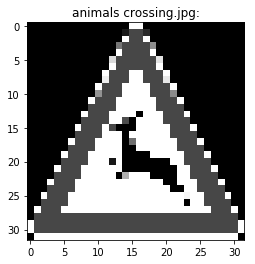

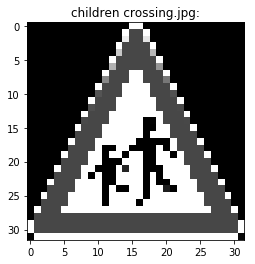

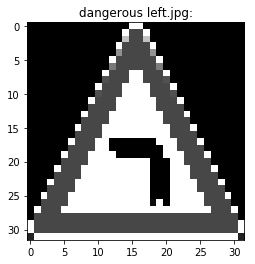

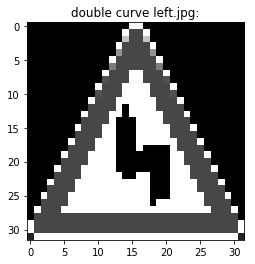

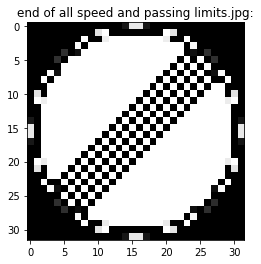

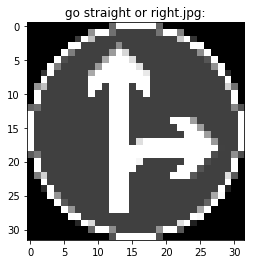

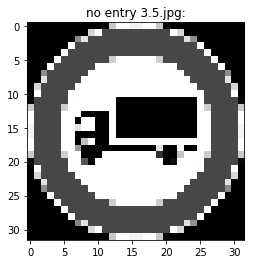

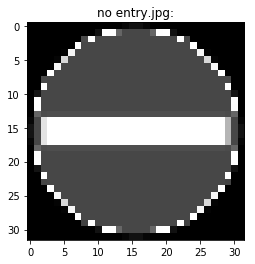

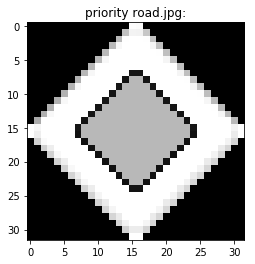

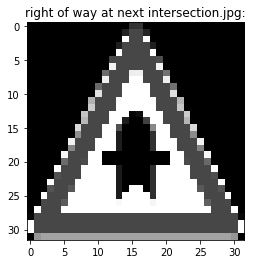

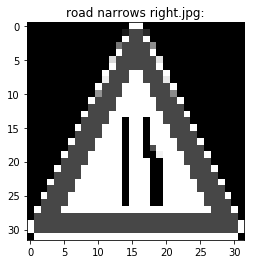

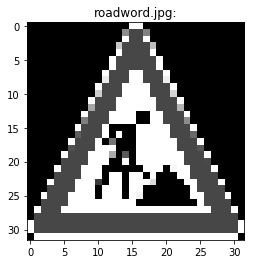

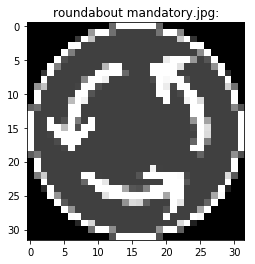

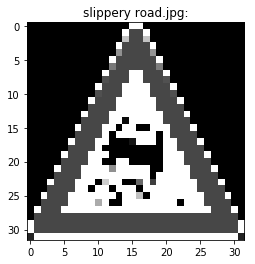

In [42]:
### Load the images and plot them here.
### Loading, preprocessing and plotting images in this box
import matplotlib.image as mpimg

def preprocess(name):
    resize=(32,32)
    image=mpimg.imread(name)
    image=cv2.resize(image,resize,interpolation=cv2.INTER_LINEAR)
    image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm=image.shape
    image=cv2.normalize(image,norm,0,255,cv2.NORM_MINMAX)
    image=cv2.resize(image,resize,interpolation=cv2.INTER_LINEAR)
    

    return image


mypath="C://Users/matth/CarND-Traffic-Sign-Classifier-Project/GermanTS"

new=[]

image_name=[]

### Namelabeling and Image preprocessing

for k in range (len(os.listdir(mypath))):
    name=os.listdir(mypath)[k]
    print(name)
    image_name.append(name)
    img=preprocess("C://Users/matth/CarND-Traffic-Sign-Classifier-Project/GermanTS/"+name)
    new.append(img)
    plt.figure(figsize=(4,4))
    plt.title(os.listdir(mypath)[k]+":")
    
    plt.imshow(new[k],cmap='gray')

newn = np.reshape(new, (-1, 32, 32, 1))

## Predict the Sign Type for Each Image

In [43]:
### Run the predictions here and use the model to output the prediction for each image.

### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

### Feel free to use as many code cells as needed.

############## Prediction-Task######################
labels=tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    label = sess.run(labels, feed_dict={x: newn})
    predi = sess.run(softmax, feed_dict={x: newn})       

print(label)


sign = pd.read_excel('signnames.xlsx')
#print(sign.axes)
#print(sign.keys())
#print(sign['SignName'])
sign_Id=sign['ClassId']
sign_Name=sign['SignName']
#print(sign_Name)

rec=[]
for i in range (len(label)):
    label_pred=label[i]
    recognition=sign_Name[label_pred]
    rec.append(recognition)
    
print((rec))    
### Feel free to use as many code cells as needed.                 
               

[31 35 19 23 32 36 10 17 12 11 24 25 12 23]
['Wild animals crossing', 'Ahead only', 'Dangerous curve to the left', 'Slippery road', 'End of all speed and passing limits', 'Go straight or right', 'No passing for vehicles over 3.5 metric tons', 'No entry', 'Priority road', 'Right-of-way at the next intersection', 'Road narrows on the right', 'Road work', 'Priority road', 'Slippery road']


In [44]:
#print(image_name)
image=[]
for i in range(len(image_name)):
    suffix='.jpg'
    img=image_name[i]
    img=img[:-len(suffix)]
    image.append(img)
print((image))

['animals crossing', 'children crossing', 'dangerous left', 'double curve left', 'end of all speed and passing limits', 'go straight or right', 'no entry 3.5', 'no entry', 'priority road', 'right of way at next intersection', 'road narrows right', 'roadword', 'roundabout mandatory', 'slippery road']


## Which Images were predicted false?

#### Image numbers [2,4,13]

2
4
13


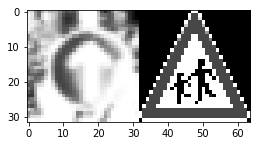

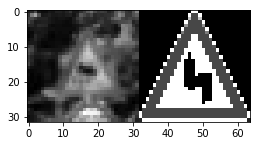

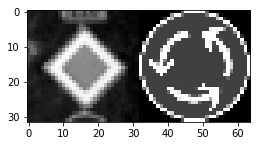

In [45]:
failure=[2,4,13]
#plot_image = np.concatenate((img_A, img_B), axis=1)
fail_pred=[X_train[19470].squeeze(),X_train[1988].squeeze(),X_train[29091].squeeze()]
  
for i in range(len(failure)):
    
    plt.figure(figsize=(4,4))
    k=failure[i]
    print(k)
    plot_image = np.concatenate((fail_pred[i], new[k-1]), axis=1)
    plt.imshow(plot_image,cmap='gray')
    
    



Prediction  | Original Image
  ------------- | -------------
  Wild animals crossing  | animals crossing
  Ahead only  | children crossing
  Dangerous curve to the left| dangerous left
  Slippery road| double curve left
  End of all speed and passing limits| end of all speed and passing limits
  Go straight or right| go straight or right
  No passing for vehicles over 3.5 metric tons| no entry 3.5
  No entry| no entry
  Priority road|priority road
  Right-of-way at the next intersection|right of way at next intersection
  Road narrows on the right|road narrows right
  Road work|roadword
  Priority road|roundabout mandatory
  Slippery road|slippery road



### As stated in the table above 11 out of 14 Images have been predicted correctly. Actually this is a good result. In percentage it's roundabout 78.5%. Number 2, 4 and 13 have been predicted wrong. This DNN isn't able to classify the signs "children crossing" (35), "double curve left" (23), "roundabout mandatory" (12). The amount of training-labels for "children crossing" is roundabout 1100 labels, "double curve left" is roundabout 500 labels, "roundabout mandatory" is roundabout 1200 labels.
### The DNN is fed with Images of a size of 32x32 which is very small. Certain details like in children crossing can't be visualized properly because of the small Image size. Information is going to be lost, so for several signs the net can't be trained properly. One suggestion is to increase the Image Input size to 128x128 or 256x256. These sizes contain more information than a 32x32 image. So it's possible to feed the DNN with more information which should increase the probability to detect a traffic sign properly.
### The 2nd failed detection is based on the center of both images. The geometry of these signs is equal, a triangle. The inner part for the fed data is small. There are a lot of black dots centered inside the traffic sign. Possible traffic signs with centered dots could be: slippery road, double curve left / right, road narrow, roadworks ... . I guess the DNN failed to detect the sign correctly because of the poor resolution of the fed images. By increasing the inputsize, we increase the amount of information and thereby we increase the chance of detecting this sign correctly.
### The reason why the 3rd sign has been missdetected is because both images have the a similar brightnessdistribution. The brightness inside the center in relation to the white surrounding (left image) or white vectors (right image) is estimated between 100 till 150. Also the edges of both images are black. This pattern can lead to a false prediction!

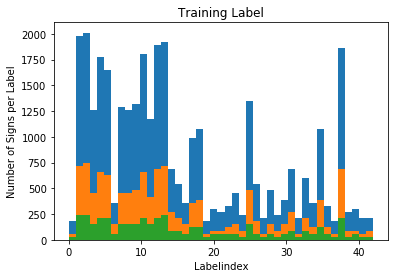

In [22]:
plt.figure()
plt.hist(y_train,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")


plt.hist(y_test,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")


plt.hist(y_valid,bins=n_classes)
plt.title("Training Label")
plt.xlabel("Labelindex")
plt.ylabel("Number of Signs per Label")

## Comparing Test Accuracy with Web Image Accuracy

### The test Accuracy is roundabout 90% whereby the Web image Accuracy is roundabout 78.5%. This difference occurs because of the size of the web image test set, which is small in comparison to the test set. So false predictions have a stronger impact on the accuracy average. Also +in the web image set are varying viewing angles of the traffic signs, different brightnesses and different sizes' of the traffic signs and the illustrated environment does not occur in the web image testset. So several pictures can be confounded with other ones which leads to false predictions.

## Analyze Performance on Pictures from Wikipedia!

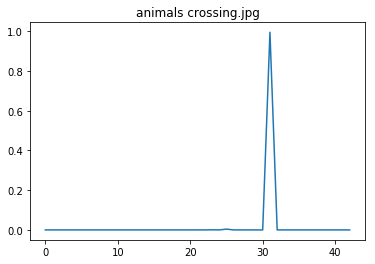

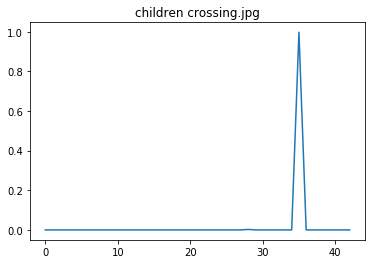

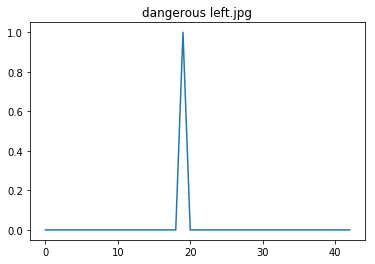

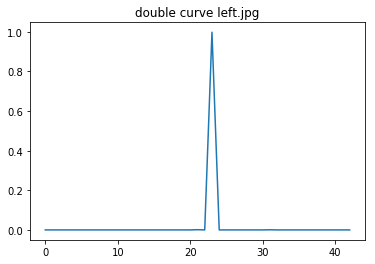

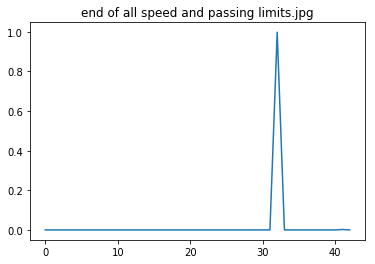

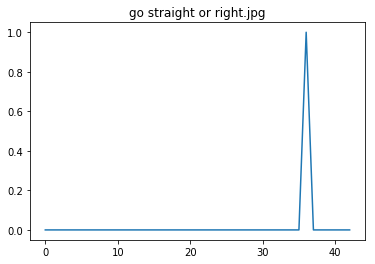

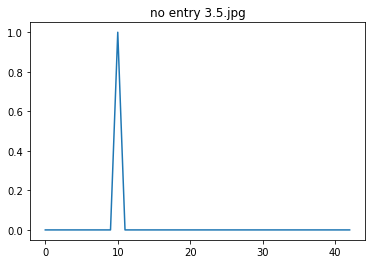

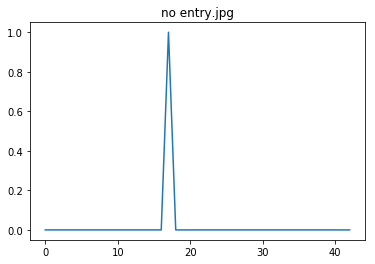

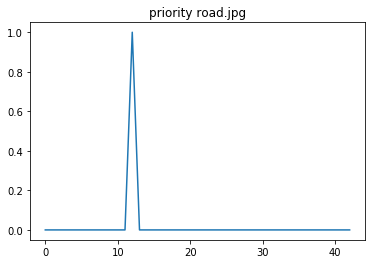

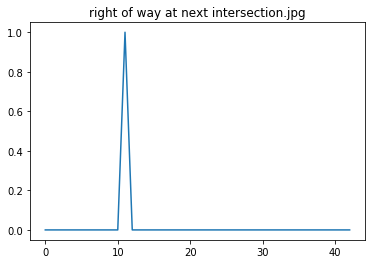

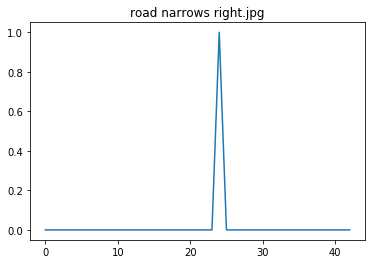

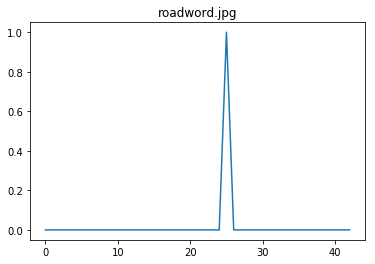

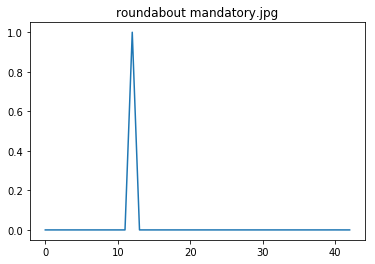

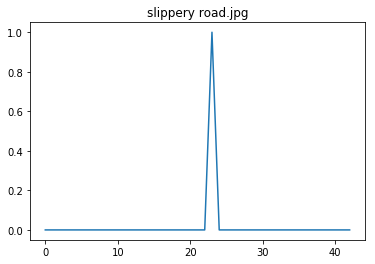

In [23]:
### Calculate the accuracy for these 5 new images. 


for i in range(len(predi)):
    plt.figure()
    plt.title(os.listdir(mypath)[i])
    plt.plot(predi[i])
    #print(predi[i])
    plt.show()

### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

## Correct Prediction

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top=[]   
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    top_k=sess.run(tf.nn.top_k(tf.constant(predi), k=5))
    top.append(top_k)

print(top)


[TopKV2(values=array([[  9.95462120e-01,   4.04172111e-03,   4.96188819e-04,
          6.83672161e-16,   1.68222381e-17],
       [  9.97538328e-01,   2.46171653e-03,   3.80906938e-11,
          2.13048416e-11,   5.26351803e-13],
       [  9.99999881e-01,   1.20512198e-07,   5.36407801e-17,
          3.37891845e-23,   1.44181804e-24],
       [  9.98164952e-01,   1.09728053e-03,   7.37450377e-04,
          2.29510462e-07,   2.00826502e-08],
       [  9.97915566e-01,   2.08448619e-03,   8.54989590e-09,
          3.18272253e-09,   1.06806908e-09],
       [  9.99996901e-01,   3.01976320e-06,   3.62387098e-08,
          1.02439444e-08,   1.72889658e-09],
       [  1.00000000e+00,   2.90955871e-10,   1.94936192e-10,
          1.64938514e-11,   1.03077772e-11],
       [  1.00000000e+00,   4.67571475e-21,   2.51634280e-21,
          8.06698855e-22,   1.56108746e-27],
       [  1.00000000e+00,   2.85063138e-19,   1.32934624e-22,
          7.41015690e-26,   6.46354646e-27],
       [  1.00000000e+

## Evaluation of softmax values

### We just evaluate the values for false predictions. Please look at the values for image 2,4 and 13!

### Image 2: 35=Ahead only prob=99%, 28= children crossing with prob(0.246%) ..., the original image has been predicted at 2nd place. not 1st one.

### Image 4: 23 Slippery road, prob=99.8%; 21 Double curve, prob=0.109% again 2nd place not 1st one!

### Image 13: 12 Priority road, prob=99.99%; 40 Roundabout mandatory, prob=0.006234%

### All false predicted Images have been predicted as 2nd one but with a percentage below 0. ... ! It looks like the DNN can predict the images properly but decides to predict another one. 

## Prediction on Images from the web!

animal crossing 1.jpg
animal crossing.jpg
children 3.jpg
children.jpg
children1.jpg
children2.jpg
mandatory roundabout 2.jpg
pedestrian crossing.jpg
priority road.jpg
road narrows on the right 1.jpg
road narrows on the right 2.jpg
road narrows on the right.jpg
slippery_road1.jpg
snow1.jpg
snow2.jpg
Stop.jpg
turn right.jpg
yield.jpg
yield1.jpg
yield2.jpg


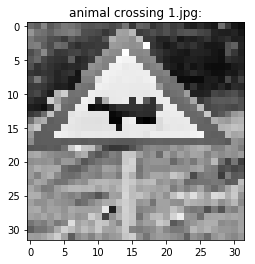

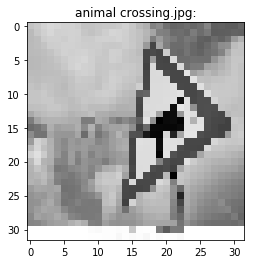

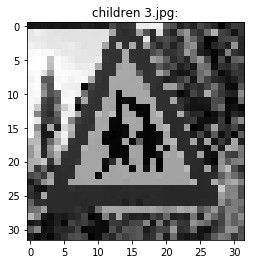

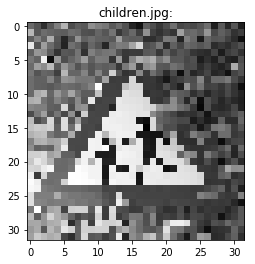

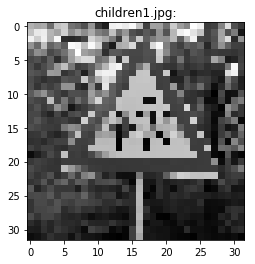

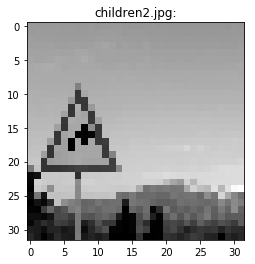

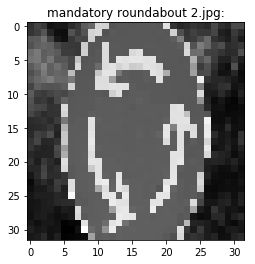

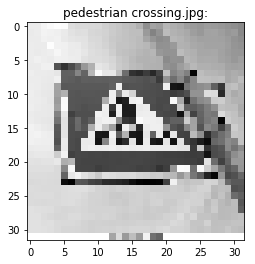

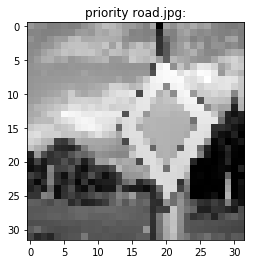

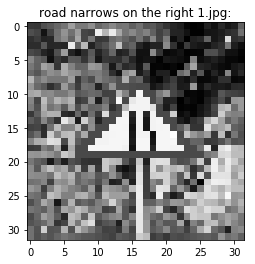

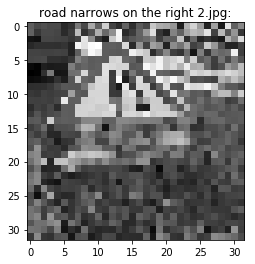

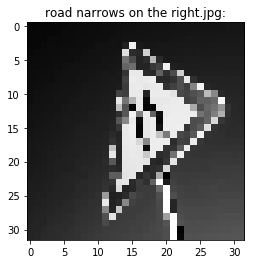

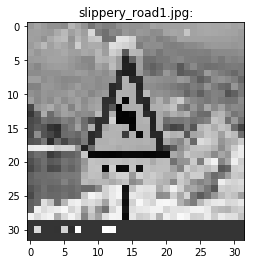

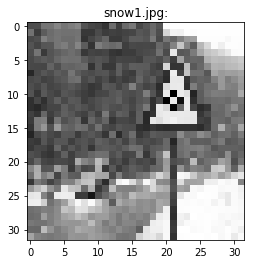

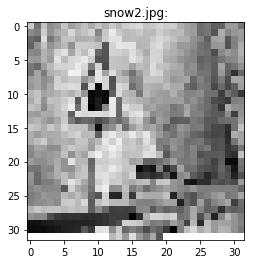

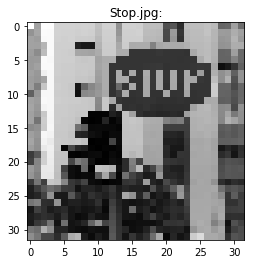

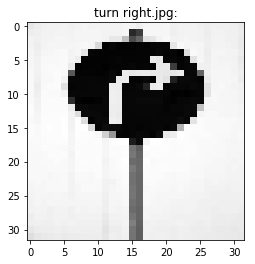

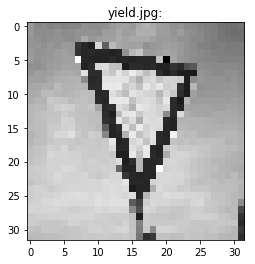

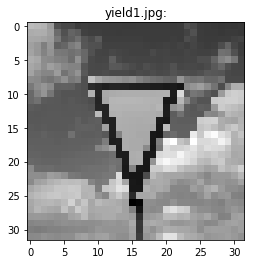

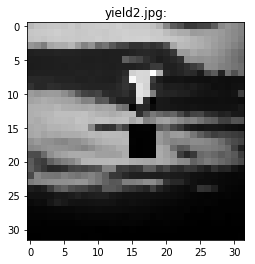

In [30]:
mypath="C://Users/matth/CarND-Traffic-Sign-Classifier-Project/GermanTSWeb"

new=[]

image_name=[]

### Namelabeling and Image preprocessing

for k in range (len(os.listdir(mypath))):
    name=os.listdir(mypath)[k]
    print(name)
    image_name.append(name)
    img=preprocess("C://Users/matth/CarND-Traffic-Sign-Classifier-Project/GermanTSWeb/"+name)
    new.append(img)
    plt.figure(figsize=(4,4))
    plt.title(os.listdir(mypath)[k]+":")
    
    plt.imshow(new[k],cmap='gray')

newm = np.reshape(new, (-1, 32, 32, 1))

In [36]:
labels=tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    labell = sess.run(labels, feed_dict={x: newm})
    predki = sess.run(softmax, feed_dict={x: newm})       

print(label)


sign = pd.read_excel('signnames.xlsx')
#print(sign.axes)
#print(sign.keys())
#print(sign['SignName'])
sign_Id=sign['ClassId']
sign_Name=sign['SignName']
#print(sign_Name)

rec=[]
for i in range (len(labell)):
    label_pred=labell[i]
    recognition=sign_Name[label_pred]
    rec.append(recognition)
    
print(rec) 
print(len(rec))

[20 12 11 28 22  9 12 23 28 30 17 20  5 42 26 38 18 13 28 11]
['Dangerous curve to the right', 'Priority road', 'Right-of-way at the next intersection', 'Children crossing', 'Bumpy road', 'No passing', 'Priority road', 'Slippery road', 'Children crossing', 'Beware of ice/snow', 'No entry', 'Dangerous curve to the right', 'Speed limit (80km/h)', 'End of no passing by vehicles over 3.5 metric tons', 'Traffic signals', 'Keep right', 'General caution', 'Yield', 'Children crossing', 'Right-of-way at the next intersection']
20


In [37]:
image=[]
for i in range(len(image_name)):
    suffix='.jpg'
    img=image_name[i]
    img=img[:-len(suffix)]
    image.append(img)
print(image)
print(len(image))

['animal crossing 1', 'animal crossing', 'children 3', 'children', 'children1', 'children2', 'mandatory roundabout 2', 'pedestrian crossing', 'priority road', 'road narrows on the right 1', 'road narrows on the right 2', 'road narrows on the right', 'slippery_road1', 'snow1', 'snow2', 'Stop', 'turn right', 'yield', 'yield1', 'yield2']
20


Prediction  | Original Image
------------- | -------------
Dangerous curve to the right  | animal crossing 1
Priority road|animal crossing
Right-of-way at the next intersection| children 3
Children crossing| children 
Bumpy road| children1
No passing|children2
Priority road|mandatory roundabout 2
Slippery road| pedestrian crossing
Children crossing| priority road
Beware of ice/snow| road narrows on the right 1
No entry|road narrows on the right 2
Dangerous curve to the right|road narrows on the right
Speed limit (80km/h)|slippery_road1
End of no passing by vehicles over 3.5 metric tons|snow1
Traffic signals|snow2
Keep right|Stop
General caution|turn right
Yield|yield
Children crossing|yield1
Right-of-way at the next intersection|yield2

  
    


### Just 2 out of 20 are correct! This are just 10% which is not much!

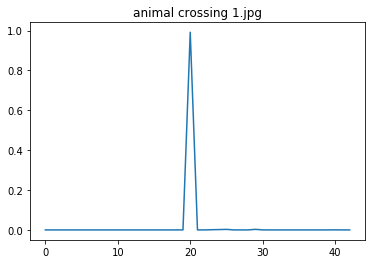

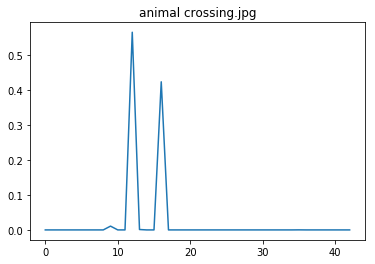

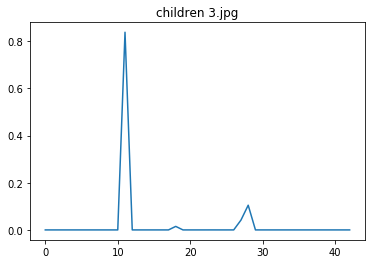

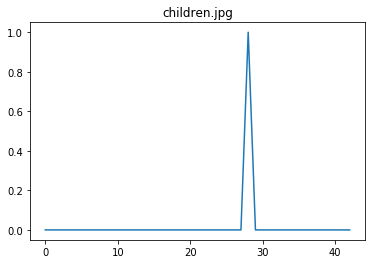

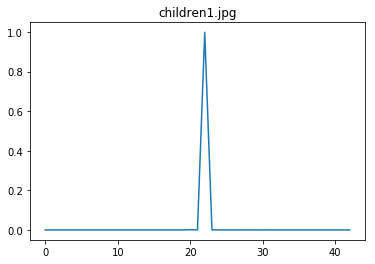

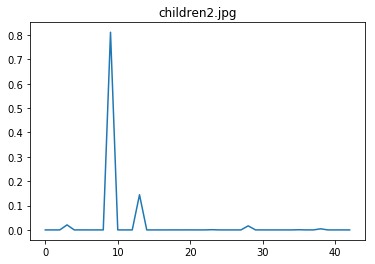

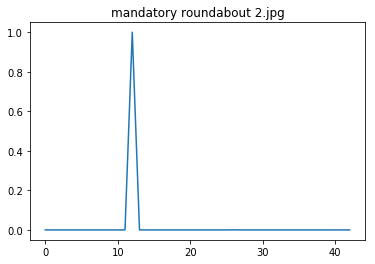

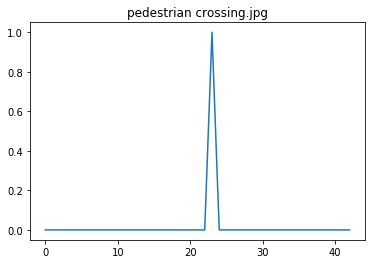

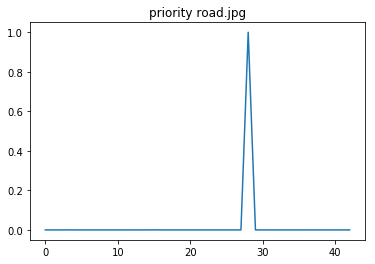

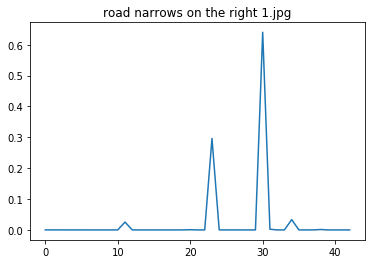

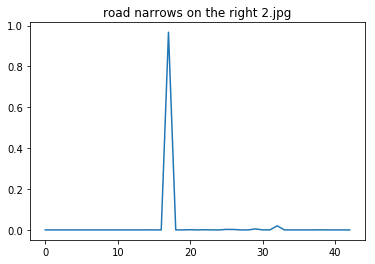

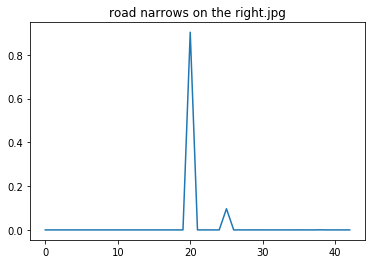

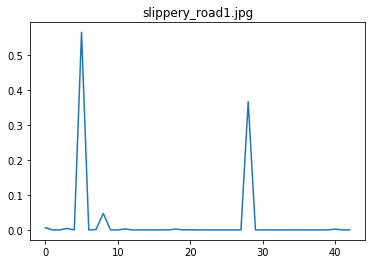

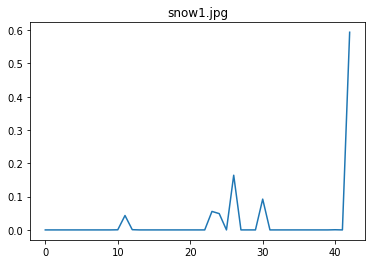

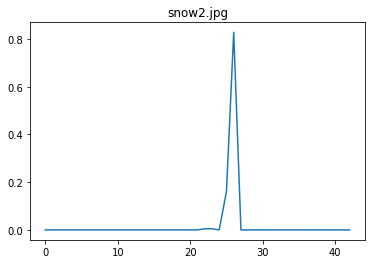

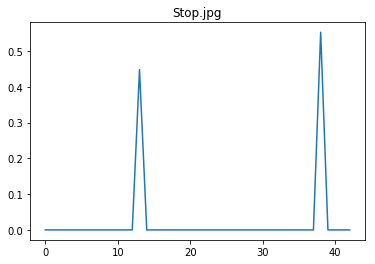

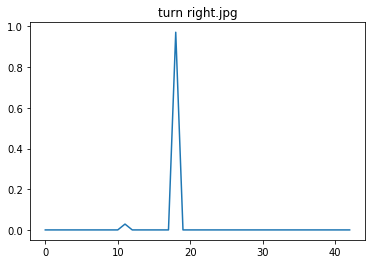

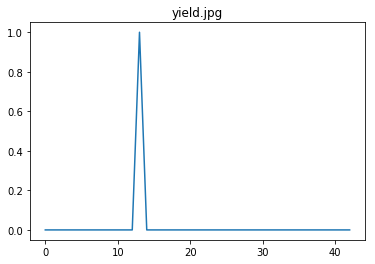

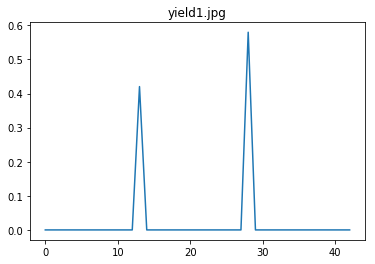

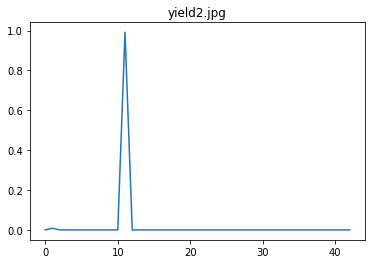

In [46]:

mypath="C://Users/matth/CarND-Traffic-Sign-Classifier-Project/GermanTSWeb"

for i in range(len(predki)):
    plt.figure()
    plt.title(os.listdir(mypath)[i])
    plt.plot(predki[i])
    #print(predi[i])
    plt.show()

In [283]:
pred_correct=2/20
print("Correct Prediction = {:.3f}".format(pred_correct)+'%')

Correct Prediction = 0.100%


In [28]:
top=[]   
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    top_k=sess.run(tf.nn.top_k(tf.constant(predi), k=5))
    top.append(top_k)

print(top)

[TopKV2(values=array([[  9.95462120e-01,   4.04172111e-03,   4.96188819e-04,
          6.83672161e-16,   1.68222381e-17],
       [  9.97538328e-01,   2.46171653e-03,   3.80906938e-11,
          2.13048416e-11,   5.26351803e-13],
       [  9.99999881e-01,   1.20512198e-07,   5.36407801e-17,
          3.37891845e-23,   1.44181804e-24],
       [  9.98164952e-01,   1.09728053e-03,   7.37450377e-04,
          2.29510462e-07,   2.00826502e-08],
       [  9.97915566e-01,   2.08448619e-03,   8.54989590e-09,
          3.18272253e-09,   1.06806908e-09],
       [  9.99996901e-01,   3.01976320e-06,   3.62387098e-08,
          1.02439444e-08,   1.72889658e-09],
       [  1.00000000e+00,   2.90955871e-10,   1.94936192e-10,
          1.64938514e-11,   1.03077772e-11],
       [  1.00000000e+00,   4.67571475e-21,   2.51634280e-21,
          8.06698855e-22,   1.56108746e-27],
       [  1.00000000e+00,   2.85063138e-19,   1.32934624e-22,
          7.41015690e-26,   6.46354646e-27],
       [  1.00000000e+

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

## Why do these predicted Images fail so hard!?

### Please check the Images which are plotted above. As you can see these Images are sized as 32x32x1. This size contains not much information. Also these images contain varying viewing angles, varying brightness and the environment is also illustrated in these images. For the DNN it's hard to predict a traffic sign properly. All this information, concentrated in this small Image size blurs the Image additionally. That's why it has such a low accuracy at this image set. To prevent these mistakes the DNN should accept as input image at least 64x64x1 / 128x128x1 to have enough space, so that the added information (varying brightness and viewing angles, environment) is not blurring up the image. Also the resized images were big ones, like 640x480 ... .

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 